# **Business Case:**
Based on given feature of dataset we need to predict the perfomance rating of employee

**MODEL CREATION & EVALUATION SUMMARY**:
* Loading pre-process data
* Define dependant & independant features
* Balancing the target feature
* Split training and testing data
* Model creation, prediction & evaluation
* Model saving

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

**Importing Preprocessed data**

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('/content/gdrive/My Drive/capstone project/project/IABAC_Project/Employee_performance_preprocessed_data.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,-0.541458,1,3,1,5,18,2,0.102061,3,...,4,-0.058535,-0.622235,2,0.868276,0.864098,-0.681372,1.202103,1,3
1,1,1.109888,1,3,1,5,18,2,0.591464,4,...,4,1.512870,-0.622235,3,0.200371,0.864098,-0.370834,0.902825,1,3
2,2,0.339260,1,5,2,5,18,1,-0.509693,4,...,3,1.512870,-0.622235,3,2.649355,2.661702,-0.370834,2.399219,1,4
3,3,0.449349,1,0,0,2,11,2,0.102061,4,...,2,1.984292,-0.622235,2,-0.244898,0.564498,3.045084,0.603546,1,3
4,4,2.541054,1,3,1,5,18,2,0.836165,4,...,4,-0.058535,-1.414051,3,-0.912803,-0.633905,-0.060296,-0.593570,1,3


# **Training and testing data splitting Splitting**

In [5]:
x = df.drop(['PerformanceRating'],axis=1)
y = df.PerformanceRating

In [6]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(x, y,random_state=3)
print(X_train.shape)
print(x_test.shape)

(900, 27)
(300, 27)


<h3><b>Balancing the target Feature</b></h3>

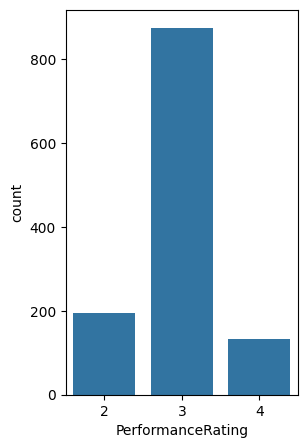

In [15]:
plt.figure(figsize=(3,5))
sns.countplot(x=df['PerformanceRating'])
plt.show()

In [16]:
!pip install imblearn

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# Smote is always applied on train data(X_train and Y_train)
x_train, y_train = smote.fit_resample(X_train,Y_train)
from collections import Counter
print("Actual Classes",Counter(Y_train))
print("SMOTE Classes",Counter(y_train))

Actual Classes Counter({3: 647, 2: 149, 4: 104})
SMOTE Classes Counter({2: 647, 3: 647, 4: 647})


In [18]:
print(x_train.shape)
y_train.shape

(1941, 27)


(1941,)

<h3><b>Model Creation,Trainig and Evaluation</b></h3>

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [20]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score, roc_auc_score

In [21]:
#  function to train and test model
def train_test_model(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    train_pred = model.predict(x_train) #for checking the training accuracy
    #code for model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')
    cf=confusion_matrix(y_test,y_pred)
    train_accuracy = accuracy_score(train_pred,y_train)
    #creating dataframe
    model_eval = pd.DataFrame({'Accuracy': [accuracy],
                                'Precision': [precision],
                                'Recall': [recall],
                                'F1 Score': [f1],
                                 'confusion_matrix':[cf],
                               'Train_accuracy':[train_accuracy]},
                                   index=[model_name])

    return model_eval

* Finding K value for KNeighbors

In [22]:
error_rate=[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.5366666666666666,
 0.5366666666666666,
 0.6066666666666667,
 0.5733333333333334,
 0.61,
 0.6,
 0.6333333333333333,
 0.5866666666666667,
 0.6566666666666666,
 0.63]

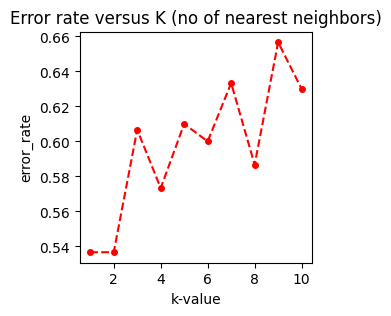

In [23]:
plt.figure(figsize=(3,3))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [24]:
# create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=2),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'MLPclassifier':MLPClassifier( hidden_layer_sizes=(50,3),learning_rate_init=0.1,max_iter=100,random_state=2)
}

# train and test models
models_eval = pd.DataFrame()
for model_name, model in models.items():
    models_eval = models_eval.append(train_test_model(model, model_name, x_train, x_test, y_train, y_test))

In [25]:
models_eval

,Accuracy,Precision,Recall,F1 Score,confusion_matrix,Train_accuracy
Logistic Regression,0.706667,0.788715,0.706667,0.728741,"[[27, 13, 5], [39, 161, 27], [1, 3, 24]]",0.792890
KNN,0.463333,0.686704,0.463333,0.519605,"[[26, 9, 10], [76, 106, 45], [11, 10, 7]]",0.912416
SVM,0.356667,0.641640,0.356667,0.412298,"[[26, 8, 11], [93, 77, 57], [13, 11, 4]]",0.405461
Naive Bayes,0.773333,0.808875,0.773333,0.785950,"[[31, 11, 3], [20, 183, 24], [1, 9, 18]]",0.844925
Decision Tree,0.896667,0.904790,0.896667,0.899237,"[[36, 7, 2], [4, 211, 12], [0, 6, 22]]",1.000000
Random Forest,0.910000,0.911235,0.910000,0.909546,"[[35, 8, 2], [3, 217, 7], [0, 7, 21]]",1.000000
Gradient Boosting,0.933333,0.932496,0.933333,0.932313,"[[37, 7, 1], [2, 221, 4], [1, 5, 22]]",0.995878
MLPclassifier,0.756667,0.572544,0.756667,0.651853,"[[0, 45, 0], [0, 227, 0], [0, 28, 0]]",0.333333


*  Gradient Boosting classifier and Random forest classifier learns well in these model.
* Doing hyperparameter tuning in these two model

<h3><b>Hyperparameter Tuning</b></h3>

* Finding best parameters for the model
* Performing tuning in Gradient boosting and Random forest models using RandomizedSearchCV

In [26]:
from sklearn.model_selection import RandomizedSearchCV


In [27]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

<h3>Random Forest Classifier</h3>

In [28]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

regr1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 555, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False})


In [29]:
rf=RandomForestClassifier(random_state=42,n_estimators= 555, min_samples_split=2,min_samples_leaf= 1,max_features='auto',max_depth= 50,bootstrap=False,)
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)
train_pred=rf.predict(x_train)

In [30]:
print('accuracy_score',accuracy_score(y_test, y_pred_rf))
print('precision_score',precision_score(y_test, y_pred_rf,average='weighted'))
print('recall_score',recall_score(y_test, y_pred_rf,average='weighted'))
print('f1_score',f1_score(y_test, y_pred_rf,average='weighted'))
print('accuracy_score',accuracy_score(y_train, train_pred))

accuracy_score 0.9333333333333333
precision_score 0.9320972627934653
recall_score 0.9333333333333333
f1_score 0.9312692623468486
accuracy_score 1.0


In [31]:
confusion_matrix(y_test,y_pred_rf)

array([[ 36,   7,   2],
       [  3, 223,   1],
       [  0,   7,  21]])

roc_auc_score

In [32]:
pred_prob = rf.predict_proba(x_test)
roc_auc_score(y_test, pred_prob, multi_class='ovr')

0.9664097656875551

<h3>GradientBoosting Classifier</h3>




In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                "loss":( 'exponential', 'deviance', 'log_loss' )}

regr1 = GradientBoostingClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 288, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 110, 'loss': 'deviance'})


In [33]:
gb=GradientBoostingClassifier(random_state=42,n_estimators= 288, min_samples_split=10,min_samples_leaf= 4,max_features='auto',max_depth= 110,loss='deviance')
gb.fit(x_train, y_train)
y_pred_gb=gb.predict(x_test)
train_pred=gb.predict(x_train)

In [34]:
print('accuracy_score',accuracy_score(y_test, y_pred_gb))
print('precision_score',precision_score(y_test, y_pred_gb,average='weighted'))
print('recall_score',recall_score(y_test, y_pred_gb,average='weighted'))
print('f1_score',f1_score(y_test, y_pred_gb,average='weighted'))
print('accuracy_score',accuracy_score(y_train, train_pred))

accuracy_score 0.95
precision_score 0.9491467444930858
recall_score 0.95
f1_score 0.948859783296006
accuracy_score 1.0


In [35]:
confusion_matrix(y_test,y_pred_gb)

array([[ 39,   5,   1],
       [  1, 224,   2],
       [  1,   5,  22]])

roc_auc_score

In [36]:
pred_prob = gb.predict_proba(x_test)
roc_auc_score(y_test, pred_prob, multi_class='ovr')

0.9668411776540072

# **Actual data v/s Prediction**

In [37]:
y_test

822    3
448    3
806    2
415    4
290    3
      ..
128    3
350    3
835    3
48     3
683    3
Name: PerformanceRating, Length: 300, dtype: int64

In [38]:
true_y=pd.DataFrame(y_test)
true_y.columns=['PerformanceRating']
true_y

,PerformanceRating
822,3
448,3
806,2
415,4
290,3
...,...
128,3
350,3
835,3
48,3


In [39]:
prediction=pd.DataFrame({'y_true':true_y['PerformanceRating'],'Gradient_boosting':y_pred_gb,'Random_forest':y_pred_rf})
prediction

,y_true,Gradient_boosting,Random_forest
822,3,3,3
448,3,3,3
806,2,2,4
415,4,3,3
290,3,3,3
...,...,...,...
128,3,3,3
350,3,3,3
835,3,3,3
48,3,3,3


In [43]:
# saving model with the help of pickle
import pickle

file = open('random_forest_model.pkl','wb')
file=open('gradient_model.pkl','wb')
pickle.dump(rf,file)
pickle.dump(gb,file)

# **Conclusion**
* Gradient boosting classifier and Random forest classifier models performs well on this data set.